In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [222]:
from sklearn.datasets import fetch_olivetti_faces
data = fetch_olivetti_faces()["data"]

In [223]:
data

array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
        0.1570248 ],
       [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
        0.15289256],
       [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
        0.15289256],
       ...,
       [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
        0.19008264],
       [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
        0.60330576],
       [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
        0.38429752]], dtype=float32)

In [224]:
data.shape

(400, 4096)

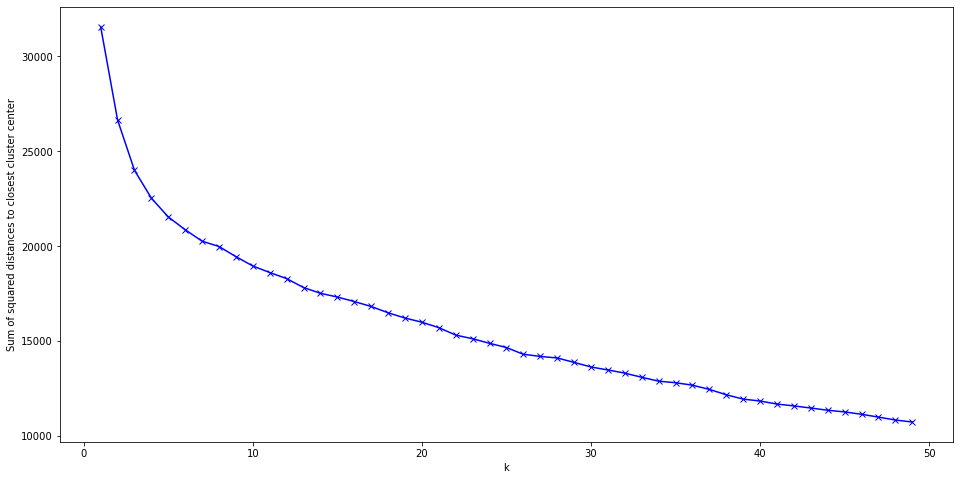

In [253]:
#distortions = []
#K = range(1,50)
#for k in K:
#    kmeanModel = KMeans(n_clusters=k,random_state=10)
#    kmeanModel.fit(data)
#    distortions.append(kmeanModel.inertia_)
distortions = [31568.12109375, 26654.689453125, 24003.310546875, 22534.7265625, 21543.8359375, 20871.19140625, 20266.37890625, 19987.09375, 19452.728515625, 18960.6953125, 18616.04296875, 18295.5703125, 17824.76171875, 17521.833984375, 17324.935546875, 17087.8671875, 16826.953125, 16495.302734375, 16217.8359375, 15998.9111328125, 15711.794921875, 15319.802734375, 15126.9560546875, 14886.888671875, 14663.205078125, 14308.8193359375, 14197.4501953125, 14115.38671875, 13881.63671875, 13639.4658203125, 13482.7626953125, 13316.01953125, 13097.3232421875, 12893.7373046875, 12810.4443359375, 12681.2724609375, 12458.4853515625, 12176.7099609375, 11947.095703125, 11846.4990234375, 11687.2177734375, 11589.158203125, 11477.1962890625, 11360.8857421875, 11271.9521484375, 11148.7001953125, 10999.1279296875, 10845.7607421875, 10740.01171875]
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters k')
plt.ylabel('Sum of squared distances to closest cluster center')
plt.show()

In [254]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=20,random_state=10)
kmeans.fit(data)
print("Cluster memberships:\n{}".format(kmeans.labels_))
print(kmeans.predict(data))

Cluster memberships:
[ 9  8  9  3  8  3  9  9  9  8  7  7  7  7  7  7  7  7  7  7  5  5  5 14
 14 13  3  3  1  1 14  7 14  1  1  3  1 14  7  1 14  5  5 14  3  3 14  3
  3  9  1  1  1 16 16 16 16 16 16 16  9  0  9  3  9  9 12  9  9  9 12 12
 12  8 12 12  8 12  3  8  5  5  5 14 14 14  3 14 14  1  1  5  8  8  1  8
  8  1  3  9 12 12 12 12 12 12 12 12  0 12  1  5 14  5  5  3  5 13  1 13
 14  5  3  3  1  1  3  3  1  1 18 18 18 18 18 18 18 18 18 18 19 14 19 19
 14 19 14 19 14 14 19  9  9  1  1 19  8  9  9  9  3  3  5  5  3  3  3  3
  3 17  1  1  1  1  1  1  1  1  1  9 13 13 13 12 12 13 12 12 12 12  2  2
  2 14  1 14  1  3  3  2  2  2  2 14 14 14  3 17 14 14 11 11 11 11 11 11
 11 11 11 11  1  1  5  1  5 14  5  1  3  3 19 19 17 17 19 19 19 19 17 17
  5  5  5  5 14  5  5  3  5  5 15 13  5  5  5 15  1  5 13  5 10 10 10 10
 10 10 10 10 10 10  6  6  6  6  6  6  6  6  6  6 11 11 11 14 17 14 14 17
 11 11  5  2  5  2  2 14  2  2 14 14 14  2  2  2  2 14  2 14 14  2  0  0
  0  0  0  0  0  0  0  0  4  4

In [255]:
df = pd.DataFrame(kmeans.labels_, columns=["Cluster"])
df["Face"]=np.arange(400)
df["Person"] = [int(x/10) for x in df["Face"]]
pd.pivot_table(df,columns="Cluster",index="Person",aggfunc="count",fill_value=0)

Face                                                                
Cluster   0  1  2  3   4  5   6   7  8  9   10  11 12 13 14  15 16 17  18 19
Person                                                                      
0          0  0  0  2   0  0   0   0  3  5   0   0  0  0  0   0  0  0   0  0
1          0  0  0  0   0  0   0  10  0  0   0   0  0  0  0   0  0  0   0  0
2          0  2  0  2   0  3   0   0  0  0   0   0  0  1  2   0  0  0   0  0
3          0  4  0  1   0  0   0   2  0  0   0   0  0  0  3   0  0  0   0  0
4          0  0  0  4   0  2   0   0  0  1   0   0  0  0  3   0  0  0   0  0
5          0  3  0  0   0  0   0   0  0  0   0   0  0  0  0   0  7  0   0  0
6          1  0  0  1   0  0   0   0  0  7   0   0  1  0  0   0  0  0   0  0
7          0  0  0  1   0  0   0   0  3  0   0   0  6  0  0   0  0  0   0  0
8          0  1  0  1   0  3   0   0  0  0   0   0  0  0  5   0  0  0   0  0
9          0  3  0  1   0  1   0   0  4  1   0   0  0  0  0   0  0  0   0  0
10         1  0  0  0   0  0   0   0  0  0   0   0  9  0  0   0  0  0   0  0
11         0  2  0  1   0  4   0   0  0  0   0   0  0  2  1   0  0  0   0  0
12         0  4  0  4   0  1   0   0  0  0   0   0  0  0  1   0  0  0   0  0
13         0  0  0  0   0  0   0   0  0  0   0   0  0  0  0   0  0  0  10  0
14         0  0  0  0   0  0   0   0  0  0   0   0  0  0  5   0  0  0   0  5
15         0  2  0  0   0  0   0   0  1  5   0   0  0  0  0   0  0  0   0  2
16         0  0  0  7   0  2   0   0  0  0   0   0  0  0  0   0  0  1   0  0
17         0  9  0  0   0  0   0   0  0  1   0   0  0  0  0   0  0  0   0  0
18         0  0  0  0   0  0   0   0  0  0   0   0  6  4  0   0  0  0   0  0
19         0  2  4  2   0  0   0   0  0  0   0   0  0  0  2   0  0  0   0  0
20         0  0  3  1   0  0   0   0  0  0   0   0  0  0  5   0  0  1   0  0
21         0  0  0  0   0  0   0   0  0  0   0  10  0  0  0   0  0  0   0  0
22         0  4  0  2   0  3   0   0  0  0   0   0  0  0  1   0  0  0   0  0
23         0  0  0  0   0  0   0   0  0  0   0   0  0  0  0   0  0  4   0  6
24         0  0  0  1   0  8   0   0  0  0   0   0  0  0  1   0  0  0   0  0
25         0  1  0  0   0  5   0   0  0  0   0   0  0  2  0   2  0  0   0  0
26         0  0  0  0   0  0   0   0  0  0  10   0  0  0  0   0  0  0   0  0
27         0  0  0  0   0  0  10   0  0  0   0   0  0  0  0   0  0  0   0  0
28         0  0  0  0   0  0   0   0  0  0   0   5  0  0  3   0  0  2   0  0
29         0  0  5  0   0  2   0   0  0  0   0   0  0  0  3   0  0  0   0  0
30         0  0  6  0   0  0   0   0  0  0   0   0  0  0  4   0  0  0   0  0
31        10  0  0  0   0  0   0   0  0  0   0   0  0  0  0   0  0  0   0  0
32         0  0  0  0  10  0   0   0  0  0   0   0  0  0  0   0  0  0   0  0
33         0  0  7  0   0  0   0   0  0  0   0   3  0  0  0   0  0  0   0  0
34         0  0  3  3   0  0   0   0  0  0   0   0  0  3  1   0  0  0   0  0
35         0  0  0  0   0  0   0   0  0  3   0   0  0  0  0   0  1  0   0  6
36         0  0  0  0   0  0   0   0  0  0   0   0  0  0  0  10  0  0   0  0
37         0  0  0  2   0  0   0   0  0  0   0   0  0  8  0   0  0  0   0  0
38         0  0  0  0   0  0   0   0  0  0   0  10  0  0  0   0  0  0   0  0
39         0  1  0  4   0  3   0   0  0  0   0   0  0  0  2   0  0  0   0  0

In [256]:
df = pd.DataFrame(kmeans.labels_, columns=["Cluster"])
df["Face"]=np.arange(400)
df["Person"] = [int(x/10) for x in df["Face"]]
pivot = pd.pivot_table(df,columns="Cluster",index="Person",aggfunc="count",fill_value=0)
pivot.max(axis=1).mean()

6.5

In [257]:
df.groupby("Cluster").count()

,Face,Person
Cluster,,
0,12,12
1,38,38
2,28,28
3,40,40
4,10,10
5,37,37
6,10,10
7,12,12
8,11,11


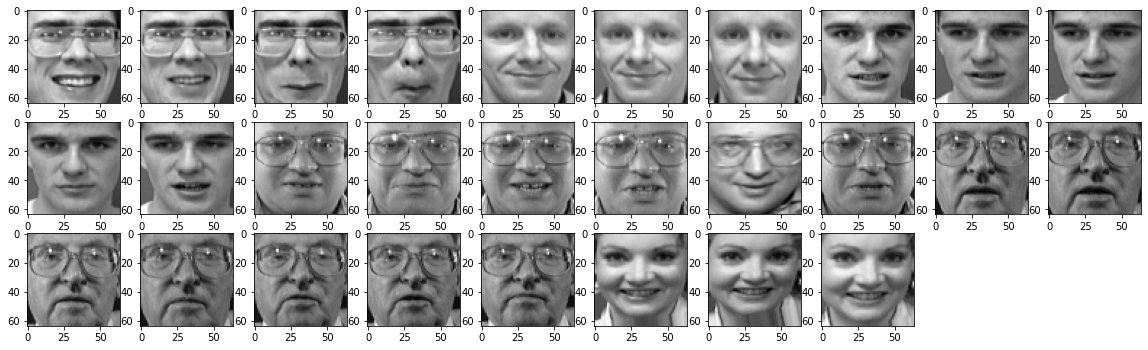

In [263]:
c = 2
fig = plt.figure(figsize=(20,14))
for i in range(len(df[df["Cluster"]==c])):
    k = df[df["Cluster"]==c]["Face"].iloc[i]
    pic = data[k,:].reshape(64,64)
    img_grid = fig.add_subplot(7, 10, i+1)
    img_grid.imshow(pic, cmap="gray")
plt.show()

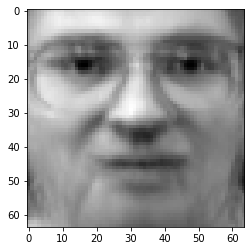

In [264]:
c = 2
pic = np.array(kmeans.cluster_centers_[c,:]).reshape(64,64)
plt.imshow(pic, cmap="gray")
plt.show()

In [230]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import KMeans
kmeans1 = KMeans(n_clusters=20,random_state=10)
kmeans1.fit(data)
kmeans2 = KMeans(n_clusters=20,random_state=20)
kmeans2.fit(data)
adjusted_rand_score(kmeans1.labels_,kmeans2.labels_)

0.5600263493222173

In [231]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import KMeans
kmeans1 = KMeans(n_clusters=5,random_state=10)
kmeans1.fit(data)
kmeans2 = KMeans(n_clusters=5,random_state=20)
kmeans2.fit(data)
adjusted_rand_score(kmeans1.labels_,kmeans2.labels_)

0.9454091246480906

In [232]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=150)
pca.fit(data)
X_projected = pca.transform(data)
kmeans = KMeans(n_clusters=5,random_state=10)
kmeans.fit(X_projected)

KMeans(n_clusters=5, random_state=10)

In [233]:
df = pd.DataFrame(kmeans.labels_, columns=["Cluster"])
df["Face"]=np.arange(400)
df["Person"] = [int(x/10) for x in df["Face"]]
pivot = pd.pivot_table(df,columns="Cluster",index="Person",aggfunc="count",fill_value=0)
pivot.max(axis=1).mean(), df.groupby("Cluster").count().max().iloc[0] , df.groupby("Cluster").count().std().iloc[0]

(7.325, 109, 20.663978319771825)

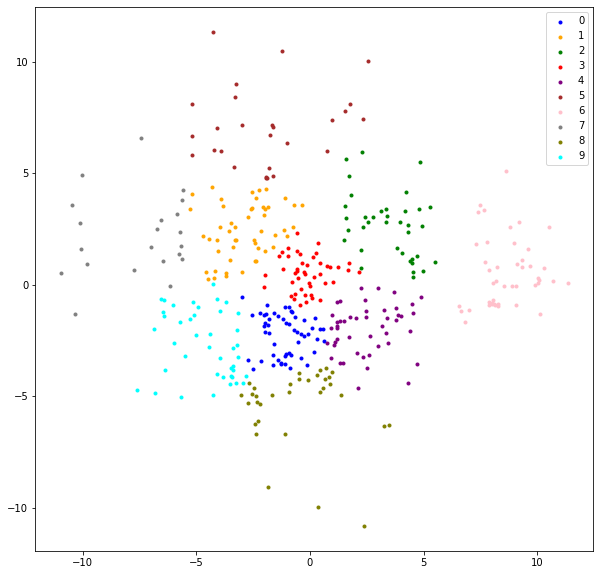

In [234]:
pca = PCA(n_components=2)
pca.fit(data)
X_projected = pca.transform(data)
kmeans = KMeans(n_clusters=10,random_state=20)
kmeans.fit(X_projected)
clusters = kmeans.labels_

colors = ["blue","orange","green","red","purple","brown","pink","grey","olive","cyan"]
plt.figure(figsize=(10,10))
for i in range(10):
    Z = X_projected[clusters == i]
    plt.scatter(Z[:,0],Z[:,1],color=colors[i],s=9,label=i)
plt.legend(loc="upper right")
plt.show()

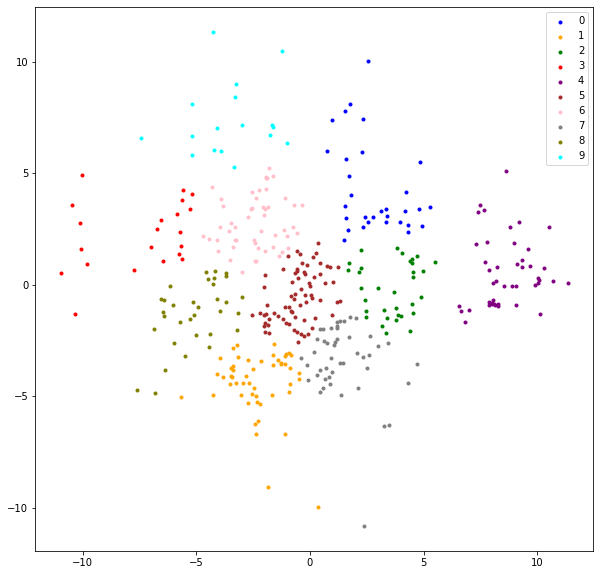

In [235]:
pca = PCA(n_components=2)
pca.fit(data)
X_projected = pca.transform(data)
kmeans = KMeans(n_clusters=10,random_state=10)
kmeans.fit(X_projected)
clusters = kmeans.labels_

colors = ["blue","orange","green","red","purple","brown","pink","grey","olive","cyan"]
plt.figure(figsize=(10,10))
for i in range(10):
    Z = X_projected[clusters == i]
    plt.scatter(Z[:,0],Z[:,1],color=colors[i],s=9,label=i)
plt.legend(loc="upper right")
plt.show()

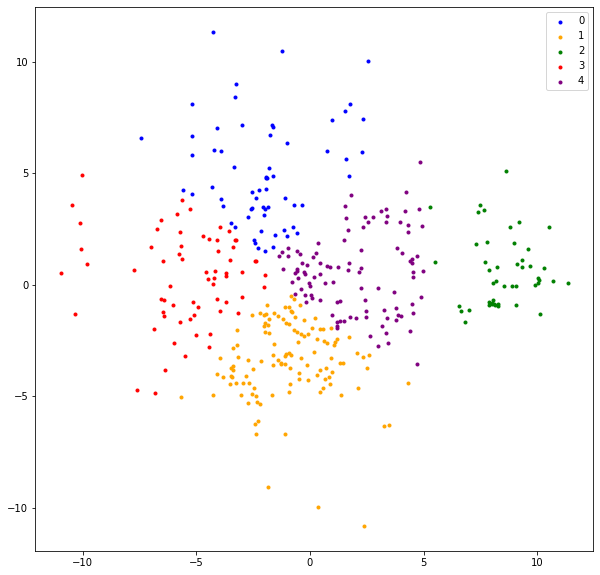

In [236]:
pca = PCA(n_components=2)
pca.fit(data)
X_projected = pca.transform(data)
kmeans = KMeans(n_clusters=5,random_state=10)
kmeans.fit(X_projected)
clusters = kmeans.labels_

colors = ["blue","orange","green","red","purple","brown","pink","grey","olive","cyan"]
plt.figure(figsize=(10,10))
for i in range(5):
    Z = X_projected[clusters == i]
    plt.scatter(Z[:,0],Z[:,1],color=colors[i],s=9,label=i)
plt.legend(loc="upper right")
plt.show()

In [237]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=None,distance_threshold=0)
assignment = agg.fit_predict(data)

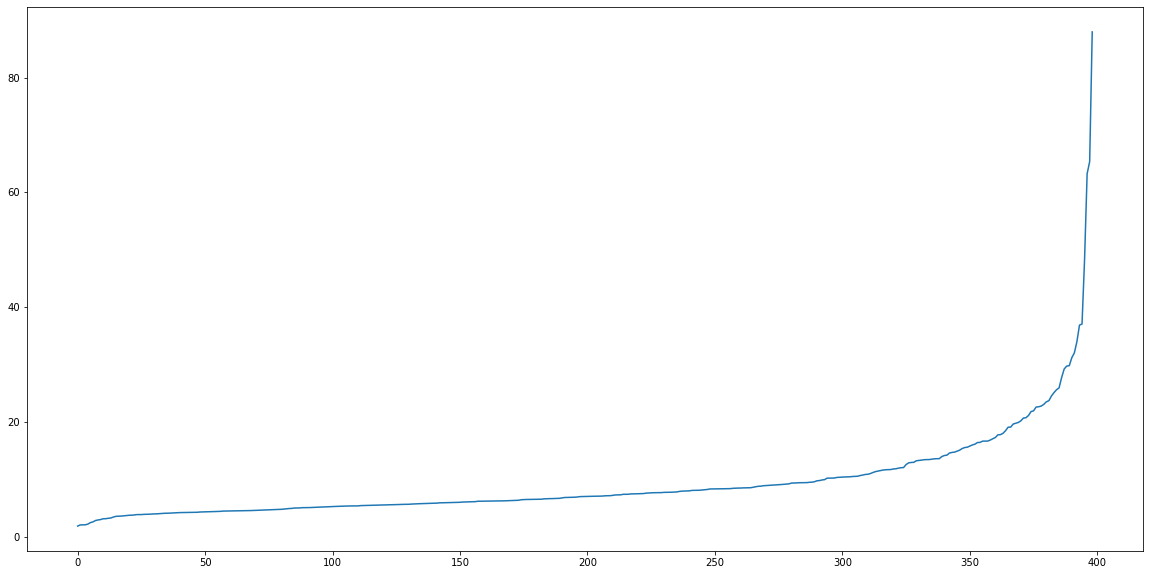

In [238]:
plt.figure(figsize=(20,10))
plt.plot(agg.distances_)

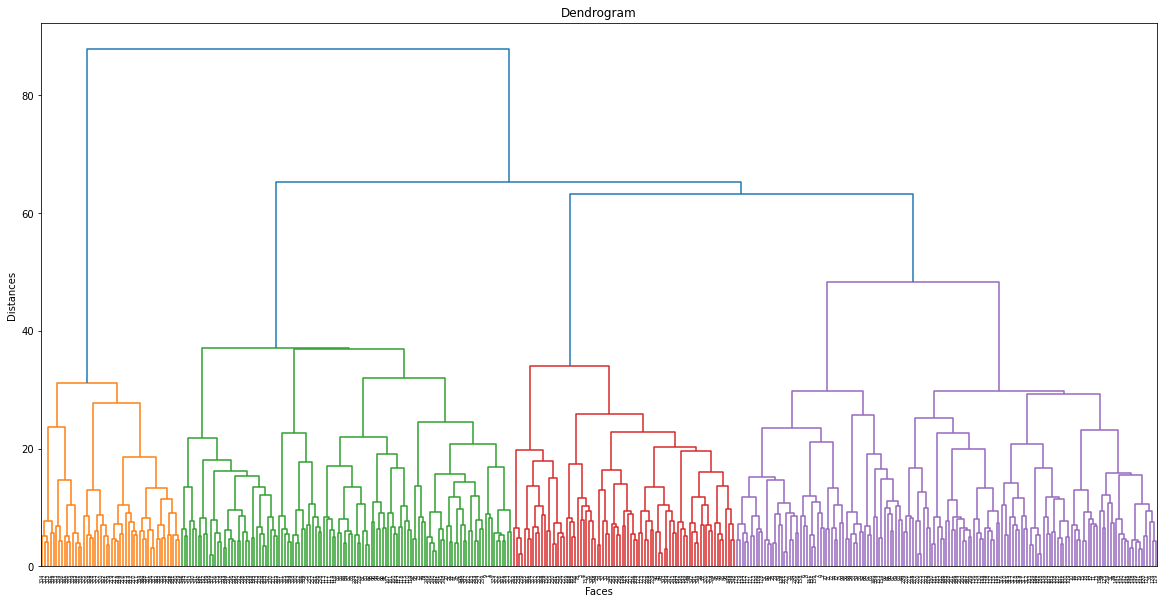

In [239]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
plt.figure(figsize=(20,10))
dendrogram = dendrogram(linkage(data, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Faces')
plt.ylabel('Distances')
plt.show()

In [240]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=20)
assignment = agg.fit_predict(data)

In [241]:
df = pd.DataFrame(assignment, columns=["Cluster"])
df["Face"]=np.arange(400)
df["Person"] = [int(x/10) for x in df["Face"]]
pivot = pd.pivot_table(df,columns="Cluster",index="Person",aggfunc="count",fill_value=0)
pivot.max(axis=1).mean(), df.groupby("Cluster").count().max().iloc[0] , df.groupby("Cluster").count().std().iloc[0]

(7.55, 50, 11.841052584791163)

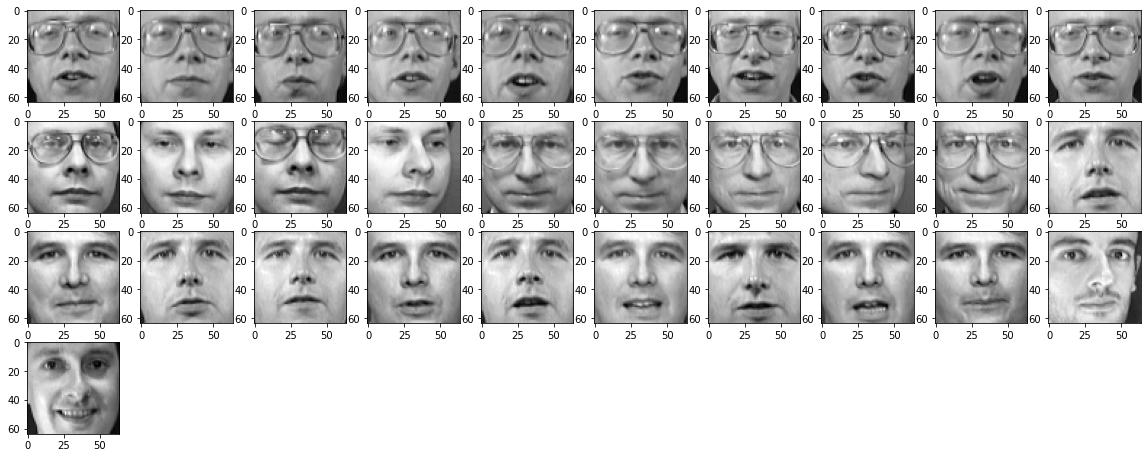

In [242]:
# Change cluster number c
c = 0
fig = plt.figure(figsize=(20,20))
for i in range(len(df[df["Cluster"]==c])):
    k = df[df["Cluster"]==c]["Face"].iloc[i]
    pic = data[k,:].reshape(64,64)
    img_grid = fig.add_subplot(10, 10, i+1)
    img_grid.imshow(pic, cmap="gray")
plt.show()

In [243]:
# Change n_clusters and random_state
from sklearn.metrics.cluster import adjusted_rand_score
kmeans = KMeans(n_clusters=20,random_state=20)
kmeans.fit(data)
agg = AgglomerativeClustering(n_clusters=20)
agg.fit(data)
adjusted_rand_score(kmeans.labels_,agg.labels_)

0.46135535609129263

In [244]:
# Change n_clusters and linkage = {‘ward’, ‘complete’, ‘average’, ‘single’}
from sklearn.metrics.cluster import adjusted_rand_score
agg1 = AgglomerativeClustering(n_clusters=10)
agg1.fit(data)
agg2 = AgglomerativeClustering(n_clusters=10,linkage="ward")
agg2.fit(data)
adjusted_rand_score(agg1.labels_,agg2.labels_)

1.0

In [245]:
# Change n_clusters and linkage = {‘ward’, ‘complete’, ‘average’, ‘single’}
agg = AgglomerativeClustering(n_clusters=30,linkage="single")
agg.fit(data)
df = pd.DataFrame(agg.labels_, columns=["Cluster"])
df["Face"]=np.arange(400)
df["Person"] = [int(x/10) for x in df["Face"]]
pivot = pd.pivot_table(df,columns="Cluster",index="Person",aggfunc="count",fill_value=0)
pivot.max(axis=1).mean(), df.groupby("Cluster").count().max().iloc[0] , df.groupby("Cluster").count().std().iloc[0]

(8.7, 311, 56.276002929731284)